In [136]:
from PIL import Image
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
def load_images(folder):
    images=[]
    for filename in os.listdir(folder):
        img_path = os.path.join(folder,filename)
        with Image.open(img_path) as img:
            img = img.resize((64,64))
            img = img.convert('L')
            img_array = np.array(img)/255
            images.append(img_array)
    return images


In [138]:
x1 = load_images(r'pizza_not_pizza\not_pizza')
x2 = load_images(r'pizza_not_pizza\pizza')

In [139]:
y1 = np.zeros(len(x1))
y2 = np.ones(len(x2))

(-0.5, 63.5, 63.5, -0.5)

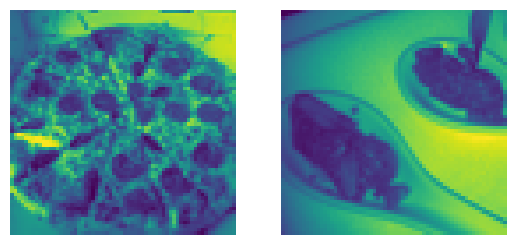

In [140]:
plt.subplot(1,2,1)
plt.imshow(x2[0])
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x1[0])
plt.axis('off')


In [141]:
X = np.concatenate((x1,x2[0:len(x1)]),axis=0)
y = np.concatenate((y1,y2),axis=0).reshape(X.shape[0],1)

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.15, random_state=12)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test =  X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [159]:
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

# Logistic regression from scratch

In [160]:
def init_w_b(dimensions):
    w = np.full((dimensions,1),0.01)
    b = 0.0
    return w,b

In [161]:
def Sigmoid(z):
    y_pred = 1/(1+np.exp(-z))
    return y_pred 

In [162]:
def gradient_descent(w,b,X_train,Y_train):
    z =  np.dot(w.T,X_train) + b
    y_pred = Sigmoid(z)
    loss = - Y_train * np.log(y_pred) - (1-Y_train) * np.log(1-y_pred)
    cost = (np.sum(loss))/X_train.shape[1]     
    d_w = (np.dot(X_train,((y_pred-Y_train).T)))/X_train.shape[1]
    d_b = np.sum(y_pred-Y_train)/X_train.shape[1]
    gradients = {"grad_w":d_w,"grad_b":d_b}
    return cost,gradients

In [163]:
def update(w,b,X_train,Y_train,learning_rate,number_of_iterations):
    cost = []
    cost_10 = []
    index = []
    for i in range(number_of_iterations):
        cost,gradients = gradient_descent(w,b,X_train,Y_train)
        w = w - learning_rate*gradients['grad_w']
        b = b - learning_rate*gradients['grad_b']
        if i%10 ==0:
            cost_10.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))  
            parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_10)
    plt.xlabel('number of iterations')
    plt.ylabel("cost")
    plt.show()
    return parameters,gradients,cost_10
        
    

In [164]:
def prediction(w,b,X_test):
    z = Sigmoid(np.dot(w.T,X_test) + b)
    y_pred = np.zeros((1,X_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]>= 0.5:
            y_pred[0,i] = 1
    return y_pred

Cost after iteration 0: 9.325078
Cost after iteration 10: 0.805039
Cost after iteration 20: 0.767387
Cost after iteration 30: 0.739957
Cost after iteration 40: 0.720307
Cost after iteration 50: 0.706613
Cost after iteration 60: 0.696976
Cost after iteration 70: 0.689975
Cost after iteration 80: 0.684657
Cost after iteration 90: 0.680411
Cost after iteration 100: 0.676853
Cost after iteration 110: 0.673745
Cost after iteration 120: 0.670942
Cost after iteration 130: 0.668353
Cost after iteration 140: 0.665923
Cost after iteration 150: 0.663617
Cost after iteration 160: 0.661412
Cost after iteration 170: 0.659293
Cost after iteration 180: 0.657247
Cost after iteration 190: 0.655266
Cost after iteration 200: 0.653342
Cost after iteration 210: 0.651471
Cost after iteration 220: 0.649647
Cost after iteration 230: 0.647866
Cost after iteration 240: 0.646124
Cost after iteration 250: 0.644420
Cost after iteration 260: 0.642749
Cost after iteration 270: 0.641111
Cost after iteration 280: 0.639

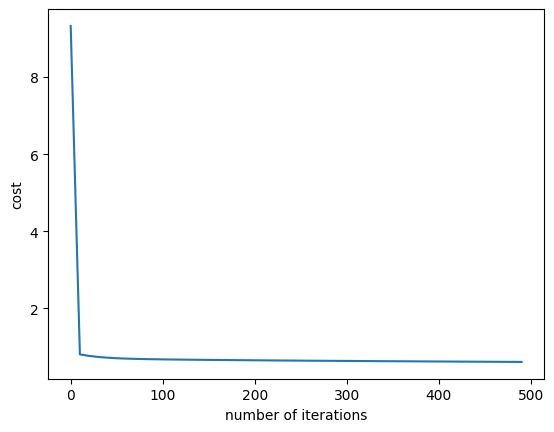

train accuracy: 66.3674446439258 %
test accuracy: 60.67796610169491 %


In [166]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = init_w_b(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = prediction(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = prediction(parameters["weight"],parameters["bias"],x_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    return parameters
parameters = logistic_regression(X_train, Y_train, X_test, Y_test,learning_rate = 0.01, num_iterations = 500)


not pizza


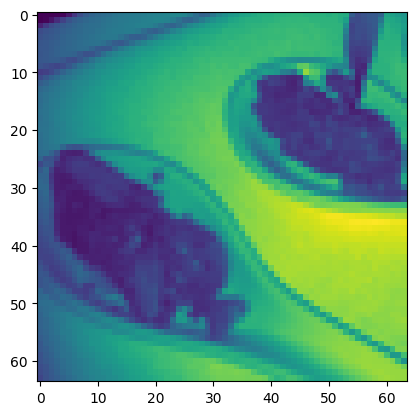

In [192]:
plt.imshow(x1[0])
img = x1[0].reshape(1,4096)
predict = prediction(parameters['weight'],parameters['bias'],img.T)
print('pizza' if predict else 'not pizza')